<a href="https://colab.research.google.com/github/TietNguyenHoangTanDat/AI-SangT5/blob/main/HW2_TienGiay_midterm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from os import listdir
from keras.utils.image_utils import img_to_array
from numpy import asarray, save
from keras.utils import load_img,img_to_array

import keras
from keras.preprocessing.image import ImageDataGenerator
import os
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
from keras.models import Sequential
from keras.models import load_model
from keras.utils import load_img
from keras.layers import Dense, Dropout, Flatten,Activation
from keras.layers import Conv2D, MaxPooling2D, Conv3D, BatchNormalization



folder_train = "drive/MyDrive/TienGiayViet/"
folder_test = "drive/MyDrive/TienGiayTest/"

data_train = ImageDataGenerator(rescale=1/255, rotation_range=0.2, horizontal_flip=True, vertical_flip=True, zoom_range=0.2)
data_test = ImageDataGenerator(rescale=1/255)

train_set = data_train.flow_from_directory(folder_train, target_size=(128, 128), batch_size=20, class_mode='categorical')
test_set = data_test.flow_from_directory(folder_test, target_size=(128, 128), batch_size=20, class_mode='categorical')

train_set.class_indices
test_set.class_indices

Found 1750 images belonging to 7 classes.
Found 245 images belonging to 7 classes.


{'10000': 0,
 '100000': 1,
 '20000': 2,
 '200000': 3,
 '5000': 4,
 '50000': 5,
 '500000': 6}

In [ ]:
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D,Normalization
from keras.models import Sequential,Model
from keras.layers import LeakyReLU
from keras.optimizers import Adam


model = Sequential()
model.add(Conv2D(32,kernel_size = (3,3),activation = 'linear',input_shape=(128,128,3),padding = 'same'))                                                          
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(64,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(128,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))

model.add(Conv2D(256,(3,3),activation = 'linear',padding = 'same'))
model.add(LeakyReLU(alpha = 0.1))
model.add(MaxPooling2D((2,2),padding = 'same'))


#ANN
model.add(Flatten())   # flatten làm phẳng ảnh
model.add(Dense(256,activation = 'linear'))
model.add(LeakyReLU(alpha = 0.1))
model.add(Dense(7,activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 64, 64, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 64)        18496     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                    

In [ ]:
model.compile(loss ='categorical_crossentropy', optimizer='Adam',  metrics = ['accuracy'])   # Adam tốc độ học 0.1
train = model.fit(train_set, epochs = 10, batch_size = 128,verbose= 1)
test_loss,test_acc = model.evaluate(train_set)
print('độ chính xác trên tập kiểm tra', test_acc)
print('hàm mất mát trên tập kiểm ta', test_loss)

Epoch 1/10
88/88 [==============================] - 238s 3s/step - loss: 1.9428 - accuracy: 0.1914
Epoch 2/10
88/88 [==============================] - 12s 132ms/step - loss: 1.1645 - accuracy: 0.4863
Epoch 3/10
88/88 [==============================] - 11s 123ms/step - loss: 0.7620 - accuracy: 0.6909
Epoch 4/10
88/88 [==============================] - 12s 131ms/step - loss: 0.6285 - accuracy: 0.7440
Epoch 5/10
88/88 [==============================] - 12s 133ms/step - loss: 0.5249 - accuracy: 0.8051
Epoch 6/10
88/88 [==============================] - 12s 131ms/step - loss: 0.3828 - accuracy: 0.8606
Epoch 7/10
88/88 [==============================] - 11s 130ms/step - loss: 0.2735 - accuracy: 0.9046
Epoch 8/10
88/88 [==============================] - 11s 131ms/step - loss: 0.2439 - accuracy: 0.9051
Epoch 9/10
88/88 [==============================] - 12s 132ms/step - loss: 0.1872 - accuracy: 0.9337
Epoch 10/10
88/88 [==============================] - 11s 127ms/step - loss: 0.2992 - accuracy

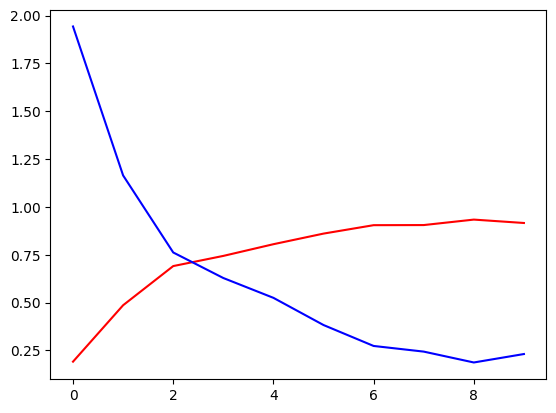

In [ ]:
import matplotlib.pyplot as plt      
accuracy = train.history['accuracy']
loss = train.history['loss']         
epochs = range(len(accuracy))
plt.plot(epochs,accuracy,'r',label = 'Training accuracy')
plt.plot(epochs,loss,'b',label = 'Training loss')
plt.show()

In [ ]:
#Lưu
from keras.models import load_model
model.save("Money.h5")
model_1=load_model('Money.h5')

In [ ]:
class_Money =    {0: '10000',
                  1: '100000',2: '20000',3: '200000',
                  4: '5000',5: '50000',6: '500000' }

1/1 [==============================] - 0s 20ms/step
Predicted:  20000


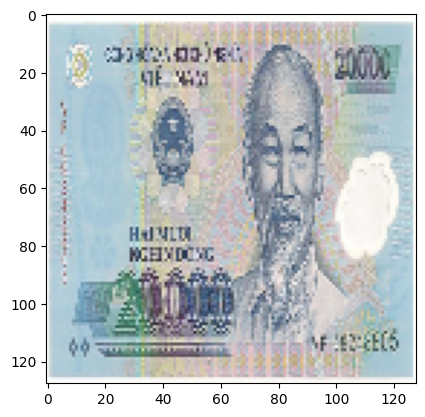

In [ ]:
#test
filePath = 'drive/MyDrive/TienGiayTest/20000/5.png'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Money[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 26ms/step
Predicted:  50000


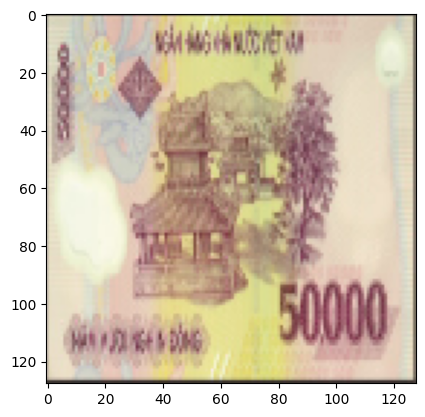

In [ ]:
#test
filePath = 'drive/MyDrive/TienGiayTest/50000/338348-07.jpg'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Money[pred_value])
plt.imshow(testImage)

1/1 [==============================] - 0s 21ms/step
Predicted:  200000


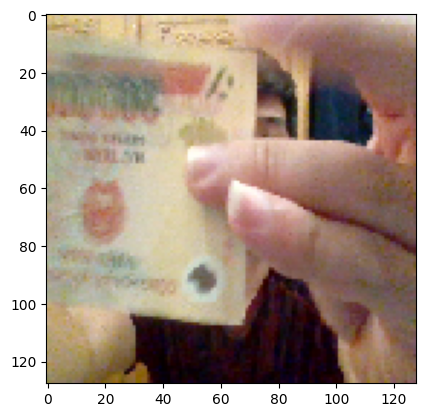

In [ ]:
#test
filePath = 'drive/MyDrive/TienGiayTest/200000/128.png'
testImage = load_img(filePath, color_mode = 'rgb', target_size=(128,128))
arrayImage = img_to_array(testImage).reshape(1,128,128,3)/255
pred_value = np.argmax(model.predict(arrayImage))
print("Predicted: ", class_Money[pred_value])
plt.imshow(testImage)